___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
import pickle
from tensorflow.keras.models import load_model

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_v, X_val, y_train_v, y_val = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

In [4]:
x_train.max()

255

In [5]:
X_train_v.max()

255

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
X_train_v.shape

(54000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
X_val.shape

(6000, 28, 28)

In [11]:
y_val.shape

(6000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

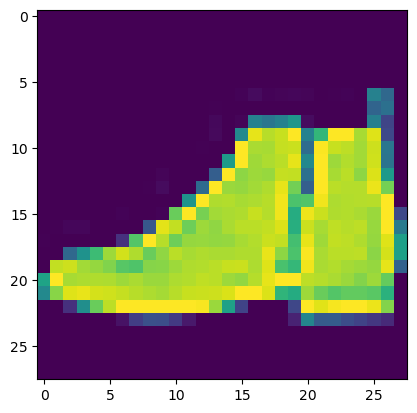

In [13]:
plt.imshow(X_train_v[1])
plt.show()

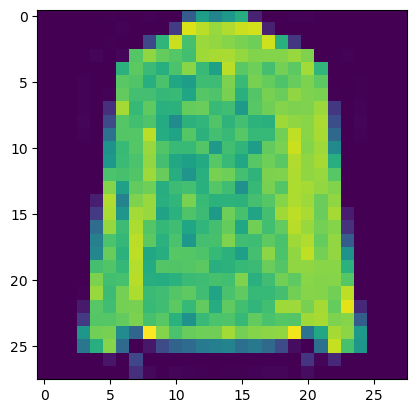

In [14]:
plt.imshow(X_train_v[16])
plt.show()

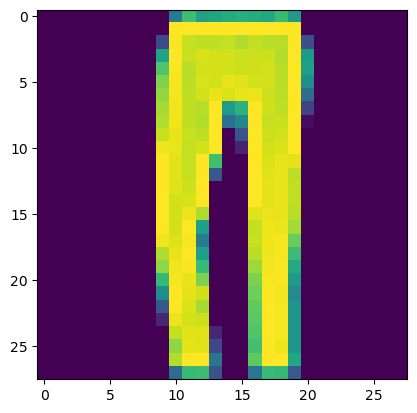

In [15]:
plt.imshow(X_train_v[11])  
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [16]:
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")
X_train /= 255
X_test /= 255

In [17]:
x_train.max()

255

In [18]:
X_train_v.max()

255

In [19]:
X_val.max()

255

In [20]:
x_test.max()

255

In [21]:
X_train_v = X_train_v.astype("float32")
X_val = X_val.astype("float32")
X_train_v /= 255
X_val /= 255

In [22]:
X_train_v.max()

1.0

In [23]:
X_train.max()

1.0

In [24]:
X_val.max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
X_train_vs = np.expand_dims(X_train_v, -1)
X_val_s = np.expand_dims(X_val, -1)

In [26]:
X_train_s = np.expand_dims(X_train, -1)
X_test_s = np.expand_dims(X_test, -1)

In [27]:
X_train_s.shape

(60000, 28, 28, 1)

In [28]:
X_val_s.shape

(6000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
y_train_vc = to_categorical(y_train_v)
y_val_vc = to_categorical(y_val)

In [30]:
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [31]:
y_train_vc.max()

1.0

In [32]:
y_val_vc.max()

1.0

In [33]:
y_train_c.max()

1.0

In [34]:
y_test_c.max()

1.0

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [35]:
model_r = Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 
        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),
        Flatten(),
        Dense(120,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(10,activation='softmax')
        
    ]
)
model_r.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

In [36]:
y_val_vc.shape

(6000, 10)

In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss", mode="min", verbose=1, patience=25,
                                           restore_best_weights=True)

In [40]:
model_r_history = model_r.fit(X_train_vs, y_train_vc, batch_size=32, epochs=50, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))#

Epoch 1/50


C:\Users\Hnana\anaconda3\Lib\site-packages\keras\src\backend.py:5577: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1688/1688 [==============================] - 70s 41ms/step - loss: 1.7423 - val_loss: 1.1601
Epoch 2/50
1688/1688 [==============================] - 63s 37ms/step - loss: 1.3302 - val_loss: 1.9542
Epoch 3/50
1688/1688 [==============================] - 84s 50ms/step - loss: 1.3261 - val_loss: 1.2404
Epoch 4/50
1688/1688 [==============================] - 165s 97ms/step - loss: 1.1764 - val_loss: 1.1808
Epoch 5/50
1688/1688 [==============================] - 165s 98ms/step - loss: 1.0847 - val_loss: 0.9918
Epoch 6/50
1688/1688 [==============================] - 169s 100ms/step - loss: 1.0518 - val_loss: 1.0372
Epoch 7/50
1688/1688 [==============================] - 153s 90ms/step - loss: 1.0663 - val_loss: 1.0562
Epoch 8/50
1688/1688 [==============================] - 169s 100ms/step - loss: 1.0641 - val_loss: 1.1441
Epoch 9/50
1688/1688 [==============================] - 165s 98ms/step - loss: 1.0455 - val_loss: 1.0683
Epoch 10/50
1688/1688 [==============================] - 173s 102ms

In [41]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu",
                 padding="same"))
model.add(MaxPool2D(pool_size=(2, 2), strides = (1, 1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 23328)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               2986112   
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2987722 (11.40 MB)
Trainable params: 2987722 (11.40 MB)
Non-trainable params: 0 (0.00 Byte)
______________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [43]:
model_history = model.fit(X_train_vs, y_train_vc, batch_size=32, epochs=50, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))#32 or less batch size

Epoch 1/50
1688/1688 [==============================] - 71s 42ms/step - loss: 0.3834 - accuracy: 0.8646 - val_loss: 0.2838 - val_accuracy: 0.8987
Epoch 2/50
1688/1688 [==============================] - 67s 40ms/step - loss: 0.2540 - accuracy: 0.9076 - val_loss: 0.2624 - val_accuracy: 0.9067
Epoch 3/50
1688/1688 [==============================] - 68s 40ms/step - loss: 0.2110 - accuracy: 0.9227 - val_loss: 0.2446 - val_accuracy: 0.9102
Epoch 4/50
1688/1688 [==============================] - 64s 38ms/step - loss: 0.1803 - accuracy: 0.9345 - val_loss: 0.2325 - val_accuracy: 0.9177
Epoch 5/50
1688/1688 [==============================] - 68s 40ms/step - loss: 0.1570 - accuracy: 0.9425 - val_loss: 0.2666 - val_accuracy: 0.9128
Epoch 6/50
1688/1688 [==============================] - 70s 41ms/step - loss: 0.1368 - accuracy: 0.9512 - val_loss: 0.2714 - val_accuracy: 0.9135
Epoch 7/50
1688/1688 [==============================] - 65s 38ms/step - loss: 0.1194 - accuracy: 0.9572 - val_loss: 0.2802 -

**TASK 7: Plot values of metrics you used in your model.**

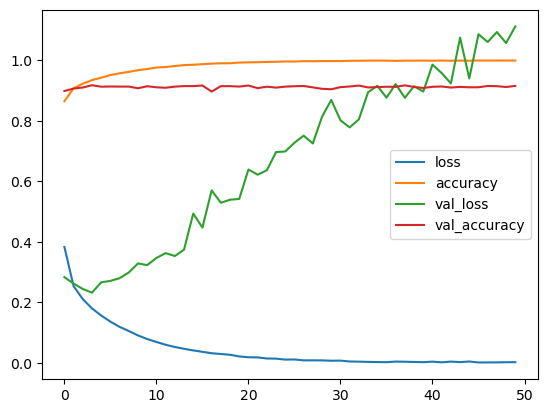

In [44]:
pd.DataFrame(model_history.history).plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.86      0.86      1000
           3       0.91      0.92      0.91      1000
           4       0.84      0.89      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.79      0.72      0.75      1000
           7       0.97      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

-------------------------------------------------------------


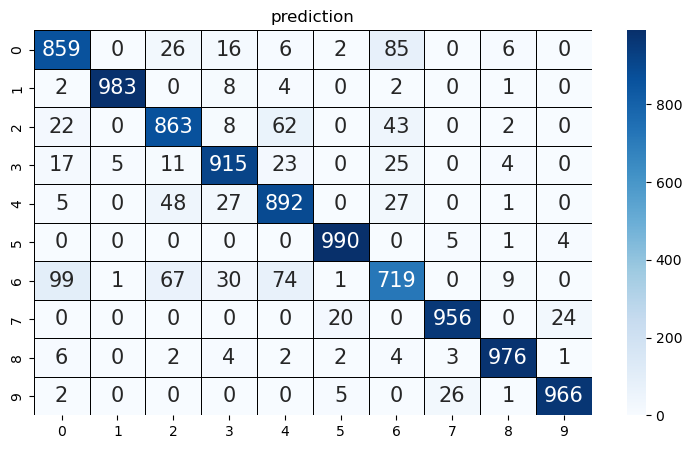

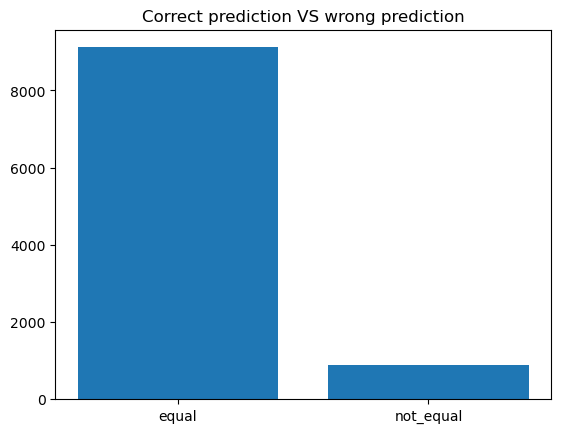

In [45]:
pred_prob = model.predict(X_test_s)
y_pred = np.argmax(pred_prob, axis=1)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Blues",
        linewidths=0.5,
        linecolor="black",
        fmt="g",
        annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("\n")
equal = np.equal(y_test, y_pred).sum()
not_equal= np.not_equal(y_test, y_pred).sum()
plt.bar(['equal','not_equal'] , [equal,not_equal] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

## Prediction

In [46]:
X_test_s[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

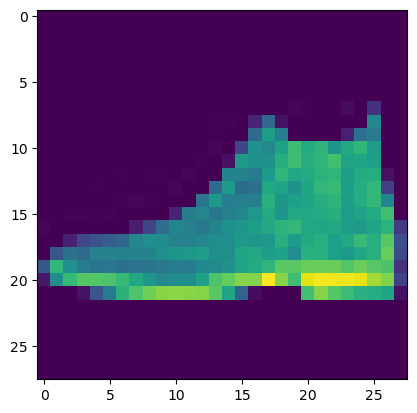

In [47]:
plt.imshow(X_test_s[0])
plt.show()

In [48]:
y_test[0]

9

In [49]:
classes[y_test[0]]

'Ankle boot'

In [50]:
X_predict = X_test_s[0]

In [51]:
X_test_s[0].shape

(28, 28, 1)

In [52]:
X_train_s[0].shape

(28, 28, 1)

In [53]:
y_test_c.shape

(10000, 10)

In [54]:
predicted_value = model.predict(np.expand_dims(X_test_s[0], 0))
predicted_value

1/1 [==============================] - 0s 51ms/step


array([[1.7260812e-28, 3.6878468e-29, 1.1133750e-21, 5.1943541e-36,
        9.0299772e-23, 5.4464155e-15, 6.4879033e-27, 7.7352342e-19,
        9.8305236e-22, 1.0000000e+00]], dtype=float32)

In [55]:
np.argmax(predicted_value)

9

Predicted value is :  Ankle boot 
Real value is: Ankle boot


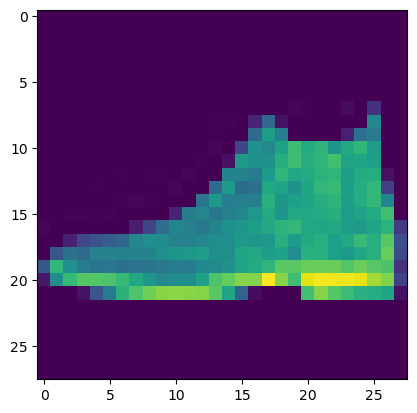

In [56]:
print('Predicted value is : ', classes[np.argmax(predicted_value)],
      '\nReal value is:', classes[y_test[0]])
plt.imshow(X_test_s[0]);

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___